<div class="alert alert-block alert-warning">

<b>CAR PRICE PREDICTION EDA</b>
    
</div>

<div class="alert alert-block alert-danger">
    
<b>HANDLING OUTLIERS</b>
    
</div>

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for Style
from colorama import Fore
from colorama import Style

import scipy.stats as stats
from scipy.stats.mstats import winsorize

import warnings;
warnings.filterwarnings('ignore')

# plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

# sns.set_style("whitegrid")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 150)
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 100

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('scoutcar_filled.csv')

In [3]:
df.head()

,Make_Model,Body_Type,Price,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Paint_Type,Nr.OfDoors,Nr.OfSeats,Upholstery_Type,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security
0,Audi A1,Sedans,15770,VAT deductible,3.00,Used,56013.00,2.00,1,Metallic,5.00,5.00,Cloth,Diesel,front,Automatic,7.00,66.00,1422.00,1220.00,3.80,99.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,Audi A1,Sedans,14500,Price negotiable,2.00,Used,80000.00,1.00,0,Metallic,3.00,4.00,Cloth,Benzine,front,Automatic,7.00,141.00,1798.00,1255.00,5.60,129.00,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,Audi A1,Sedans,14640,VAT deductible,3.00,Used,83450.00,1.00,0,Metallic,4.00,4.00,Cloth,Diesel,front,Automatic,7.00,85.00,1598.00,1250.00,3.80,99.00,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."
3,Audi A1,Sedans,14500,VAT deductible,3.00,Used,73000.00,1.00,0,Metallic,3.00,4.00,Cloth,Diesel,front,Automatic,6.00,66.00,1422.00,1195.00,3.80,99.00,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote..."
4,Audi A1,Sedans,16790,VAT deductible,3.00,Used,16200.00,1.00,1,Metallic,5.00,5.00,Cloth,Diesel,front,Automatic,7.00,66.00,1422.00,1250.00,4.10,109.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15917 entries, 0 to 15916
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make_Model               15917 non-null  object 
 1   Body_Type                15917 non-null  object 
 2   Price                    15917 non-null  int64  
 3   Vat                      15917 non-null  object 
 4   Age                      15917 non-null  float64
 5   Type                     15917 non-null  object 
 6   Km                       15917 non-null  float64
 7   Previous_Owners          15917 non-null  float64
 8   Inspection_New           15917 non-null  int64  
 9   Paint_Type               15917 non-null  object 
 10  Nr.OfDoors               15917 non-null  float64
 11  Nr.OfSeats               15917 non-null  float64
 12  Upholstery_Type          15917 non-null  object 
 13  Fuel                     15917 non-null  object 
 14  Drive_Chain           

In [5]:
df.shape

(15917, 26)

In [6]:
df.size

413842

In [7]:
df.dtypes.value_counts()

object     13
float64    11
int64       2
dtype: int64

In [8]:
df.isnull().sum().sum()

0

<div class="alert alert-block alert-danger">
    
<b>REVIEW OF NUMERIC COLUMNS</b>
    
</div>

<div class="alert alert-block alert-info">

<b>Km</b></div>

In [9]:
df.Km.describe()

count    15917.00
mean     31967.94
std      37073.85
min          0.00
25%       2000.00
50%      20407.00
75%      46900.00
max     317000.00
Name: Km, dtype: float64

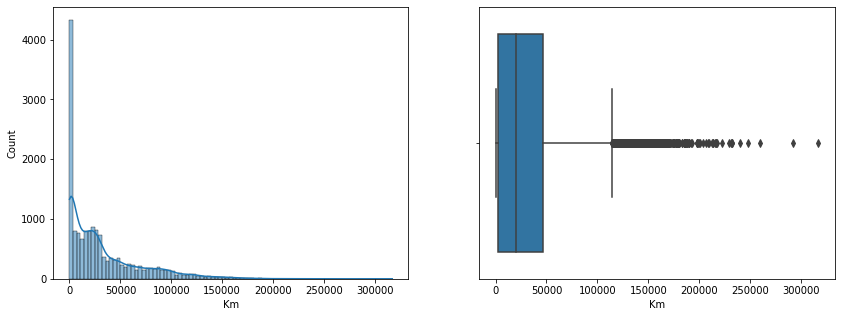

In [10]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df.Km, kde=True, ax=ax[0])
sns.boxplot(df.Km, ax=ax[1]);

In [11]:
# df['Km_logged'] = np.log(df.Km)

In [12]:
# We cannot talk about the existence of outliers for kilometer values.

<div class="alert alert-block alert-info">

<b>Hp_kW</b></div>

In [13]:
df.Hp_kW.describe()

count   15917.00
mean       88.38
std        26.84
min         1.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: Hp_kW, dtype: float64

In [14]:
df.Hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  44.,  51.,  55.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        56.,  53.,  54., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [15]:
df[df.Hp_kW < 40].Hp_kW.value_counts()

1.00    20
9.00     1
4.00     1
Name: Hp_kW, dtype: int64

In [16]:
df[(df.Hp_kW == 1) | (df.Hp_kW == 4) | (df.Hp_kW == 9)][['Make_Model', 'Body_Type', 'Displacement_cc', 'Hp_kW']]

,Make_Model,Body_Type,Displacement_cc,Hp_kW
3912,Audi A3,Sedans,1598.00,9.00
6004,Opel Astra,Station wagon,998.00,1.00
6033,Opel Astra,Station wagon,998.00,1.00
6945,Opel Astra,Station wagon,1598.00,1.00
7013,Opel Astra,Sedans,1364.00,1.00
7015,Opel Astra,Sedans,1364.00,1.00
7017,Opel Astra,Sedans,1364.00,1.00
7018,Opel Astra,Sedans,1364.00,1.00
9284,Opel Corsa,Sedans,1229.00,1.00
9286,Opel Corsa,Sedans,1229.00,1.00


In [17]:
df.Hp_kW.loc[df.Hp_kW < 40] = np.nan

In [18]:
df.Hp_kW.isnull().sum()

22

In [19]:
df[df.Hp_kW.isnull()]['Displacement_cc'].unique()

array([1598.,  998., 1364., 1229.,  898., 1589.])

In [20]:
for group1 in df[df.Hp_kW.isnull()]['Make_Model'].unique().tolist():
    for group2 in df[df.Hp_kW.isnull()]['Body_Type'].unique().tolist():
        for group3 in df[df.Hp_kW.isnull()]['Displacement_cc'].unique().tolist():
        
            cond1 = (df['Make_Model']==group1)
            cond2 = (df['Make_Model']==group1) & (df['Body_Type']==group2)
            cond3 = (df['Make_Model']==group1) & (df['Body_Type']==group2) & (df['Displacement_cc']==group3)
        
            mode1 = list(df[cond1]['Hp_kW'].mode())
            mode2 = list(df[cond2]['Hp_kW'].mode())
            mode3 = list(df[cond3]['Hp_kW'].mode())
        
            if mode3 != []:
                df.loc[cond3, 'Hp_kW'] = df.loc[cond3, 'Hp_kW'].fillna(df[cond3]['Hp_kW'].mode()[0])
            elif mode2 != []:
                df.loc[cond3, 'Hp_kW'] = df.loc[cond3, 'Hp_kW'].fillna(df[cond2]['Hp_kW'].mode()[0])
            elif mode1 != []:
                df.loc[cond3, 'Hp_kW'] = df.loc[cond3, 'Hp_kW'].fillna(df[cond1]['Hp_kW'].mode()[0])    
            else:
                df.loc[cond3, 'Hp_kW'] = df.loc[cond3, 'Hp_kW'].fillna(df['Hp_kW'].mode()[0])

In [21]:
df.Hp_kW.isnull().sum()

0

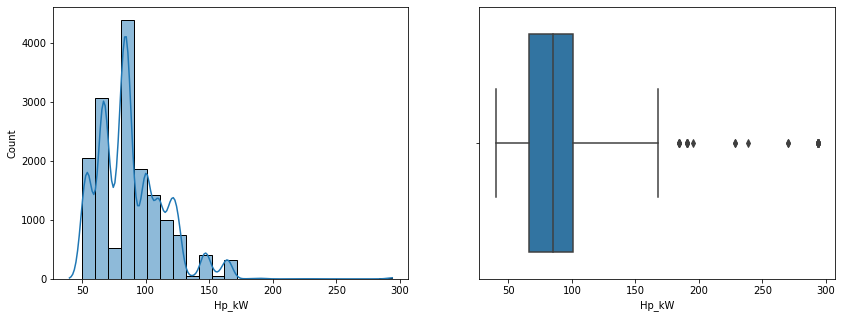

In [22]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df.Hp_kW, kde=True, bins=25, ax=ax[0])
sns.boxplot(df.Hp_kW, whis=2, ax=ax[1]);

In [23]:
IQR = stats.iqr(df.Hp_kW)
IQR

35.0

In [24]:
lower_lim = df.Hp_kW.quantile(0.25) - 1.5*IQR
lower_lim

13.5

In [25]:
upper_lim = df.Hp_kW.quantile(0.75) + 1.5*IQR
upper_lim

153.5

In [26]:
df.Hp_kW[(df.Hp_kW < lower_lim) | (df.Hp_kW > upper_lim)].value_counts()

165.00    194
162.00     98
154.00     39
164.00     27
294.00     18
191.00      7
155.00      6
184.00      5
168.00      3
228.00      2
270.00      2
167.00      2
239.00      1
195.00      1
163.00      1
Name: Hp_kW, dtype: int64

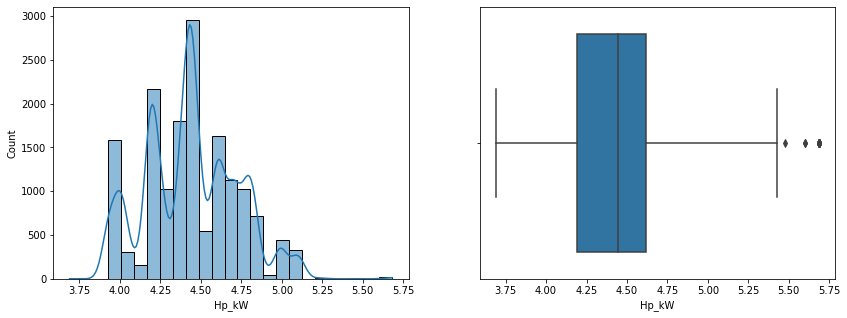

In [27]:
# log

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(np.log(df.Hp_kW), kde=True, bins=25, ax=ax[0])
sns.boxplot(np.log(df.Hp_kW), whis=2, ax=ax[1]);

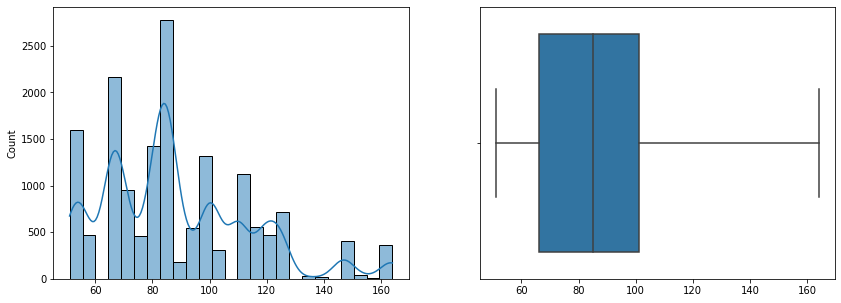

In [28]:
# winsorize

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(winsorize(df.Hp_kW, (0.015)), kde=True, bins=25, ax=ax[0])
sns.boxplot(winsorize(df.Hp_kW, (0.015)), whis=2, ax=ax[1]);

<div class="alert alert-block alert-info">

<b>Displacement_cc</b></div>

In [29]:
df.Displacement_cc.describe()

count   15917.00
mean     1425.02
std       330.99
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: Displacement_cc, dtype: float64

In [30]:
df.Displacement_cc.sort_values()

12466       1.00
14318       1.00
14317       1.00
14313       1.00
14312       1.00
          ...   
3603     2480.00
3607     2480.00
10770    2967.00
7168    15898.00
10931   16000.00
Name: Displacement_cc, Length: 15917, dtype: float64

In [31]:
df[(df.Displacement_cc < 500) | (df.Displacement_cc > 3000)]['Displacement_cc'].value_counts()

1.00        36
160.00       6
139.00       4
2.00         2
15898.00     1
140.00       1
122.00       1
16000.00     1
54.00        1
Name: Displacement_cc, dtype: int64

In [32]:
cond = df[(df.Displacement_cc < 500) | (df.Displacement_cc > 3000)]['Displacement_cc'].unique().tolist()

df.Displacement_cc.replace(cond, np.nan, inplace=True)

In [33]:
df.Displacement_cc.isnull().sum()

53

In [34]:
for group1 in df['Make_Model'].unique().tolist():
    for group2 in df['Body_Type'].unique().tolist():
        for group3 in df[df['Displacement_cc'].isnull()]['Hp_kW'].unique().tolist():
        
            cond1 = (df['Make_Model']==group1)
            cond2 = (df['Make_Model']==group1) & (df['Body_Type']==group2)
            cond3 = (df['Make_Model']==group1) & (df['Body_Type']==group2) & (df['Hp_kW']==group3)
        
            mode1 = list(df[cond1]['Displacement_cc'].mode())
            mode2 = list(df[cond2]['Displacement_cc'].mode())
            mode3 = list(df[cond3]['Displacement_cc'].mode())
        
            if mode3 != []:
                df.loc[cond3, 'Displacement_cc'] = df.loc[cond3, 'Displacement_cc'] \
                                        .fillna(df[cond3]['Displacement_cc'].mode()[0])
            elif mode2 != []:
                df.loc[cond3, 'Displacement_cc'] = df.loc[cond3, 'Displacement_cc'] \
                                        .fillna(df[cond2]['Displacement_cc'].mode()[0])
            elif mode1 != []:
                df.loc[cond3, 'Displacement_cc'] = df.loc[cond3, 'Displacement_cc'] \
                                        .fillna(df[cond1]['Displacement_cc'].mode()[0])    
            else:
                df.loc[cond3, 'Displacement_cc'] = df.loc[cond3, 'Displacement_cc'] \
                                        .fillna(df['Displacement_cc'].mode()[0])

In [35]:
df.Displacement_cc.isnull().sum()

0

In [36]:
df.Displacement_cc.value_counts().head(10)

1598.00    5013
999.00     2463
1398.00    1333
1399.00     771
1956.00     694
1229.00     693
1461.00     658
1490.00     578
1422.00     473
898.00      374
Name: Displacement_cc, dtype: int64

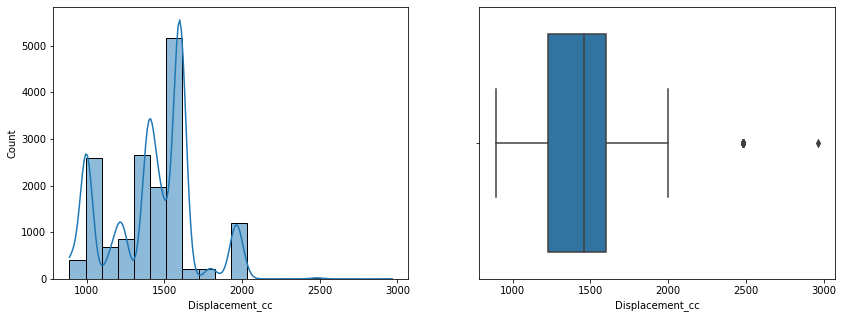

In [37]:
# log

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df.Displacement_cc, kde=True, bins=20, ax=ax[0])
sns.boxplot(df.Displacement_cc, ax=ax[1]);

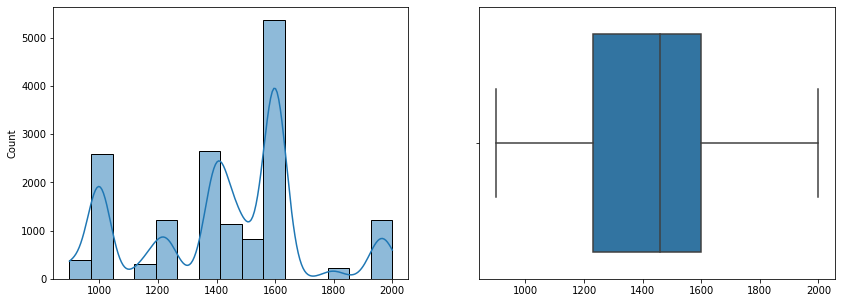

In [38]:
# winsorize

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(winsorize(df.Displacement_cc, (0.002)), kde=True, bins=15, ax=ax[0])
sns.boxplot(winsorize(df.Displacement_cc, (0.002)), whis=2, ax=ax[1]);

<div class="alert alert-block alert-info">

<b>Weight_kg</b></div>

In [39]:
df.Weight_kg.describe()

count   15917.00
mean     1342.41
std       207.94
min         1.00
25%      1165.00
50%      1279.00
75%      1441.00
max      2471.00
Name: Weight_kg, dtype: float64

In [40]:
df.Weight_kg.sort_values()

12778      1.00
8354       1.00
1143     102.00
8856     840.00
14311    900.00
          ...  
15676   2471.00
15183   2471.00
15229   2471.00
15278   2471.00
14973   2471.00
Name: Weight_kg, Length: 15917, dtype: float64

In [41]:
df['Weight_kg'].replace([102, 1], np.nan, inplace=True)

In [42]:
df.Weight_kg.isnull().sum()

3

In [43]:
for group1 in df['Make_Model'].unique().tolist():
    for group2 in df['Body_Type'].unique().tolist():
        
        cond1 = (df['Make_Model']==group1)
        cond2 = (df['Make_Model']==group1) & (df['Body_Type']==group2)
        
        mode1 = list(df[cond1]['Weight_kg'].mode())
        mode2 = list(df[cond2]['Weight_kg'].mode())
        
        if mode2 != []:
            df.loc[cond2, 'Weight_kg'] = df.loc[cond2, 'Weight_kg'].fillna(df[cond2]['Weight_kg'].mode()[0])
        elif mode1 != []:
            df.loc[cond2, 'Weight_kg'] = df.loc[cond2, 'Weight_kg'].fillna(df[cond1]['Weight_kg'].mode()[0])
        else:
            df.loc[cond2, 'Weight_kg'] = df.loc[cond2, 'Weight_kg'].fillna(df['Weight_kg'].mode()[0])

In [44]:
df.Weight_kg.isnull().sum()

0

In [45]:
df.Weight_kg.value_counts().head(10)

1163.00    1513
1360.00    1061
1165.00     704
1180.00     648
1701.00     637
1135.00     610
1350.00     567
1273.00     551
1734.00     444
1425.00     437
Name: Weight_kg, dtype: int64

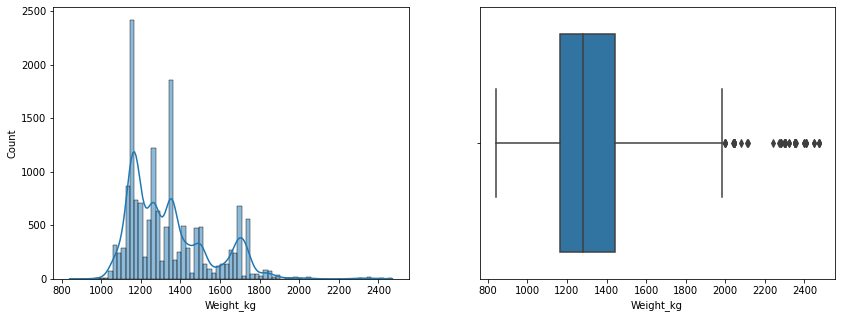

In [46]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df.Weight_kg, kde=True, ax=ax[0])
sns.boxplot(df.Weight_kg, whis=2, ax=ax[1]);

In [47]:
IQR = stats.iqr(df.Weight_kg)
IQR

276.0

In [48]:
lower_lim = df.Weight_kg.quantile(0.25) - 1.5*IQR
lower_lim

751.0

In [49]:
upper_lim = df.Weight_kg.quantile(0.75) + 1.5*IQR
upper_lim

1855.0

In [50]:
df.Weight_kg[(df.Weight_kg < lower_lim) | (df.Weight_kg > upper_lim)].value_counts()

1890.00    19
2044.00    18
2353.00    15
2300.00    12
1880.00     8
1901.00     7
1985.00     7
1975.00     7
1940.00     6
2000.00     6
2471.00     5
1900.00     4
2410.00     4
1865.00     4
1958.00     3
1875.00     3
1929.00     2
2320.00     2
2400.00     2
2280.00     2
2450.00     2
1891.00     1
2355.00     1
1939.00     1
1870.00     1
2115.00     1
2080.00     1
2275.00     1
2240.00     1
2270.00     1
1950.00     1
2110.00     1
2295.00     1
1905.00     1
1974.00     1
1885.00     1
1960.00     1
2037.00     1
Name: Weight_kg, dtype: int64

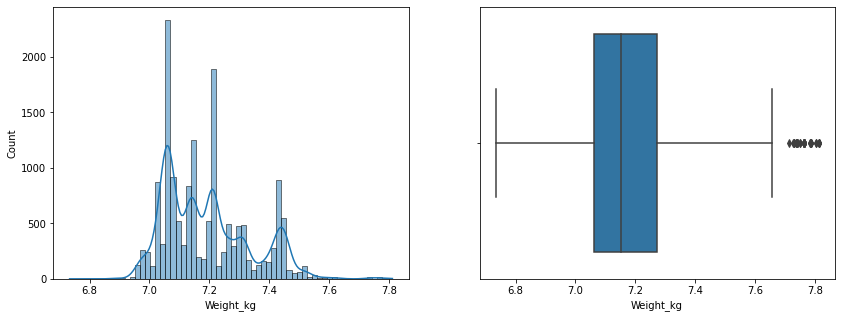

In [51]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

cond = np.log(df.Weight_kg)

sns.histplot(cond, kde=True, ax=ax[0])
sns.boxplot(cond, whis=2, ax=ax[1]);

In [52]:
cond.quantile(0.25)

7.060476365999801

In [53]:
cond.quantile(0.75)

7.273092595999522

In [54]:
lower_lim_log = cond.quantile(0.25) - 1.5 * (cond.quantile(0.75)-cond.quantile(0.25))
upper_lim_log = cond.quantile(0.75) + 1.5 * (cond.quantile(0.75)-cond.quantile(0.25))

In [55]:
lower_lim_log

6.741552021000219

In [56]:
upper_lim_log

7.592016940999104

<div class="alert alert-block alert-info">

<b>CO2_Emission (g/km CO2)</b></div>

In [57]:
df['CO2_Emission (g/km CO2)'].describe()

count   15917.00
mean      122.63
std       248.55
min         0.00
25%       104.00
50%       117.00
75%       129.00
max     14457.00
Name: CO2_Emission (g/km CO2), dtype: float64

In [58]:
df['CO2_Emission (g/km CO2)'].sort_values().head(15)

10565    0.00
8216     0.00
14900    1.00
11552    5.00
13007    5.00
6396     5.00
8109    14.00
3611    36.00
3616    36.00
3614    36.00
12546   45.00
9797    51.00
7856    80.00
13415   82.00
13738   82.00
Name: CO2_Emission (g/km CO2), dtype: float64

In [59]:
df[df.Fuel=='Electric']['CO2_Emission (g/km CO2)']

3355   106.00
3611    36.00
3614    36.00
3616    36.00
Name: CO2_Emission (g/km CO2), dtype: float64

In [60]:
df['CO2_Emission (g/km CO2)'].sort_values().tail(15)

10788     197.00
12421     197.00
12053     199.00
12528     199.00
10770     239.00
10512     253.00
535       331.00
4555      990.00
4088     1060.00
5817    12087.00
6578    12087.00
6577    12087.00
8541    12324.00
12342   13983.00
11887   14457.00
Name: CO2_Emission (g/km CO2), dtype: float64

In [61]:
df['CO2_Emission (g/km CO2)'].replace([0, 1, 5, 14, 45, 51, 331, 990, 1060, 12087, 12324, 13983, 14457], np.nan, inplace=True)

In [62]:
df['CO2_Emission (g/km CO2)'].isnull().sum()

18

In [63]:
for group1 in df[df['CO2_Emission (g/km CO2)'].isnull()].Make_Model.unique().tolist():
    for group2 in df[df['CO2_Emission (g/km CO2)'].isnull()].Body_Type.unique().tolist():
        for group3 in df['Fuel'].unique().tolist():
            
            cond1 = (df['Make_Model']==group1)
            cond2 = (df['Make_Model']==group1) & (df['Body_Type']==group2)
            cond3 = (df['Make_Model']==group1) & (df['Body_Type']==group2) & (df['Fuel']==group3)
            
            df.loc[cond3, 'CO2_Emission (g/km CO2)'] = df.loc[cond3, 'CO2_Emission (g/km CO2)'] \
                                                       .fillna(df[cond3]['CO2_Emission (g/km CO2)'].median()) \
                                                       .fillna(df[cond2]['CO2_Emission (g/km CO2)'].median()) \
                                                       .fillna(df[cond1]['CO2_Emission (g/km CO2)'].median()) \
                                                       .fillna(df['CO2_Emission (g/km CO2)'].median())

In [64]:
df['CO2_Emission (g/km CO2)'].isnull().sum()

0

In [65]:
df['CO2_Emission (g/km CO2)'].value_counts().head(10)

120.00    1000
104.00     782
97.00      632
124.00     594
99.00      593
102.00     501
85.00      456
103.00     445
128.00     421
106.00     420
Name: CO2_Emission (g/km CO2), dtype: int64

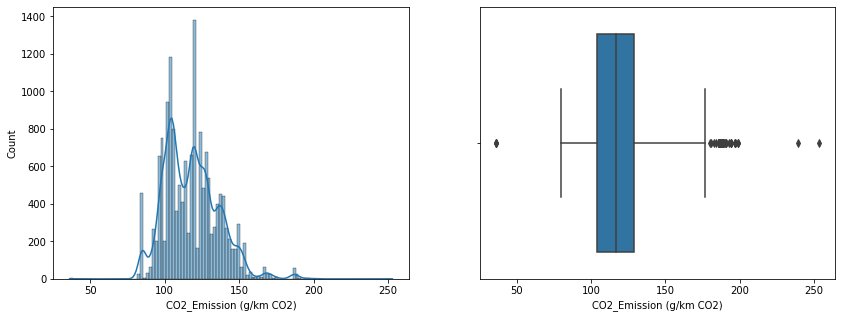

In [66]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df['CO2_Emission (g/km CO2)'], kde=True, ax=ax[0])
sns.boxplot(df['CO2_Emission (g/km CO2)'], whis=2, ax=ax[1]);

In [67]:
IQR = stats.iqr(df['CO2_Emission (g/km CO2)'])
IQR

25.0

In [68]:
lower_lim = df['CO2_Emission (g/km CO2)'].quantile(0.25) - 1.5*IQR
lower_lim

66.5

In [69]:
upper_lim = df['CO2_Emission (g/km CO2)'].quantile(0.75) + 1.5*IQR
upper_lim

166.5

In [70]:
df['CO2_Emission (g/km CO2)'][(df['CO2_Emission (g/km CO2)'] < lower_lim) \
                              | (df['CO2_Emission (g/km CO2)'] > upper_lim)].value_counts()

168.00    58
186.00    32
187.00    26
172.00    25
189.00    19
169.00    15
170.00    10
175.00     8
188.00     7
174.00     6
197.00     4
36.00      3
194.00     3
167.00     2
199.00     2
191.00     2
177.00     1
183.00     1
171.00     1
180.00     1
239.00     1
181.00     1
184.00     1
190.00     1
253.00     1
193.00     1
Name: CO2_Emission (g/km CO2), dtype: int64

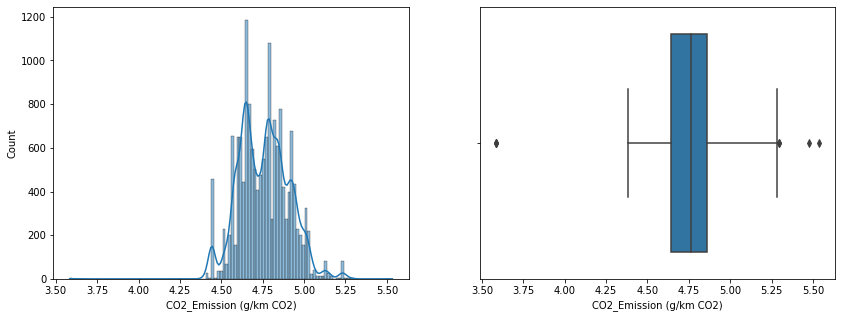

In [71]:
# log

fig, ax = plt.subplots(1,2, figsize=(14,5))

cond = np.log(df['CO2_Emission (g/km CO2)'])

sns.histplot(cond, kde=True, ax=ax[0])
sns.boxplot(cond, whis=2, ax=ax[1]);

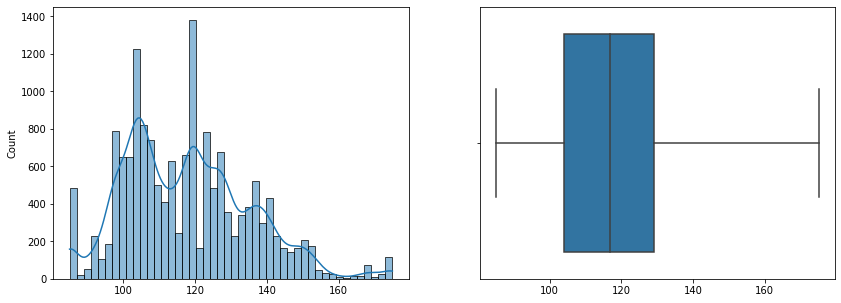

In [72]:
# winsorize

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(winsorize(df['CO2_Emission (g/km CO2)'], (0.007)), kde=True, ax=ax[0])
sns.boxplot(winsorize(df['CO2_Emission (g/km CO2)'], (0.007)), whis=2, ax=ax[1]);

<div class="alert alert-block alert-info">

<b>Cons_Comb (l/100 km)</b></div>

In [73]:
df['Cons_Comb (l/100 km)'].describe()

count   15917.00
mean        4.82
std         0.89
min         1.60
25%         4.00
50%         4.80
75%         5.40
max         9.10
Name: Cons_Comb (l/100 km), dtype: float64

In [74]:
df['Cons_Comb (l/100 km)'].sort_values()

3616    1.60
3614    1.60
3611    1.60
6905    3.00
6439    3.00
        ... 
10788   8.60
12053   8.70
10816   8.70
12528   8.70
10770   9.10
Name: Cons_Comb (l/100 km), Length: 15917, dtype: float64

In [75]:
df[df['Cons_Comb (l/100 km)'] == 1.60][['Make_Model','Body_Type','Fuel','Cons_Comb (l/100 km)']]

,Make_Model,Body_Type,Fuel,Cons_Comb (l/100 km)
3611,Audi A3,Sedans,Electric,1.60
3614,Audi A3,Sedans,Electric,1.60
3616,Audi A3,Sedans,Electric,1.60


In [76]:
# Using our domain knowledge we can conclude that min value of 3 and max value of 9.10 are normal. 
# But anyways, let's analyze outliers with plotting, np.log and winsorize methods.

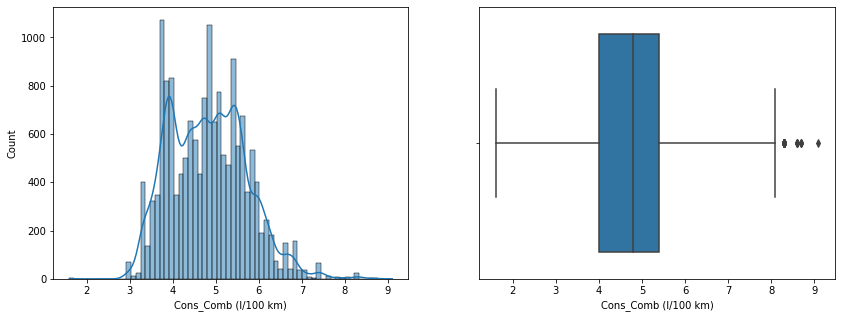

In [77]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df['Cons_Comb (l/100 km)'], kde=True, ax=ax[0])
sns.boxplot(df['Cons_Comb (l/100 km)'], whis=2, ax=ax[1]);

In [78]:
IQR = stats.iqr(df['Cons_Comb (l/100 km)'])
IQR

1.4000000000000004

In [79]:
lower_lim = df['Cons_Comb (l/100 km)'].quantile(0.25) - 1.5*IQR
lower_lim

1.8999999999999995

In [80]:
upper_lim = df['Cons_Comb (l/100 km)'].quantile(0.75) + 1.5*IQR
upper_lim

7.500000000000001

In [81]:
df['Cons_Comb (l/100 km)'][(df['Cons_Comb (l/100 km)'] < lower_lim) | (df['Cons_Comb (l/100 km)'] > upper_lim)].value_counts()

8.30    23
7.60    14
7.80     6
8.00     5
8.60     4
1.60     3
8.70     3
7.90     3
8.10     2
9.10     1
Name: Cons_Comb (l/100 km), dtype: int64

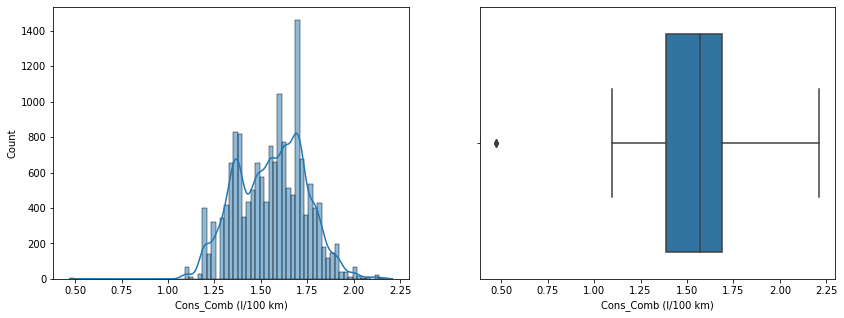

In [82]:
# log

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(np.log(df['Cons_Comb (l/100 km)']), kde=True, ax=ax[0])
sns.boxplot(np.log(df['Cons_Comb (l/100 km)']), whis=2, ax=ax[1]);

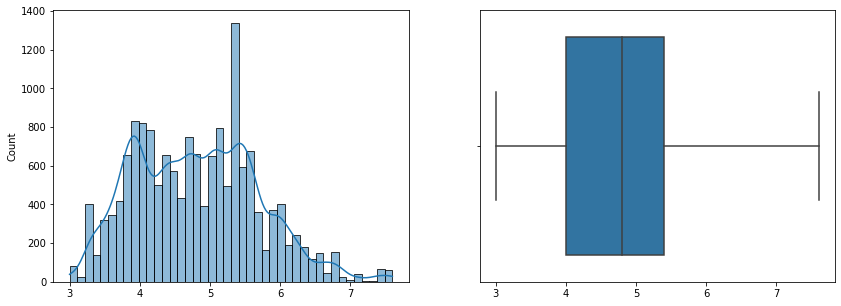

In [83]:
# winsorize

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(winsorize(df['Cons_Comb (l/100 km)'], (0.003)), kde=True, ax=ax[0])
sns.boxplot(winsorize(df['Cons_Comb (l/100 km)'], (0.003)), whis=2, ax=ax[1]);

<div class="alert alert-block alert-info">

<b>Price</b></div>

In [84]:
df.Price.describe()

count   15917.00
mean    18019.86
std      7385.81
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: Price, dtype: float64

In [85]:
df.Price.sort_values()

8593        13
8827       120
6065       255
8828       331
8826      4950
         ...  
15826    64332
3586     64900
3648     67600
15824    68320
3647     74600
Name: Price, Length: 15917, dtype: int64

In [86]:
df.drop(index = [8593, 8827, 6065,8828], axis = 0, inplace = True)

In [87]:
df.reset_index(drop = True, inplace = True)

In [88]:
df.shape

(15913, 26)

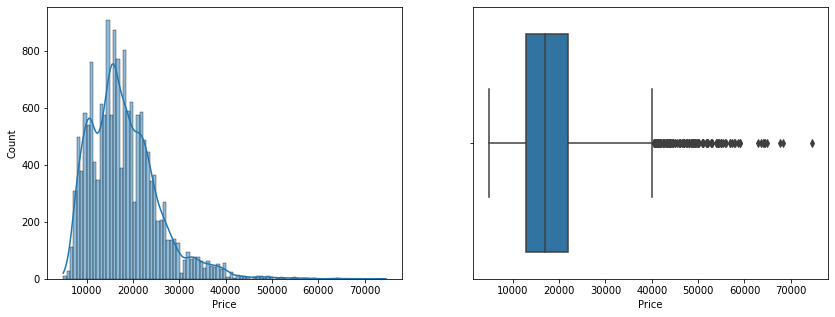

In [89]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df['Price'], kde=True, ax=ax[0])
sns.boxplot(df['Price'], whis=2, ax=ax[1]);

In [90]:
IQR = stats.iqr(df.Price)
IQR

9050.0

In [91]:
lower_lim = df.Price.quantile(0.25) - 1.5*IQR
lower_lim

-725.0

In [92]:
upper_lim = df.Price.quantile(0.75) + 1.5*IQR
upper_lim

35475.0

In [93]:
df.Price[(df.Price < lower_lim) | (df.Price > upper_lim)].count()

479

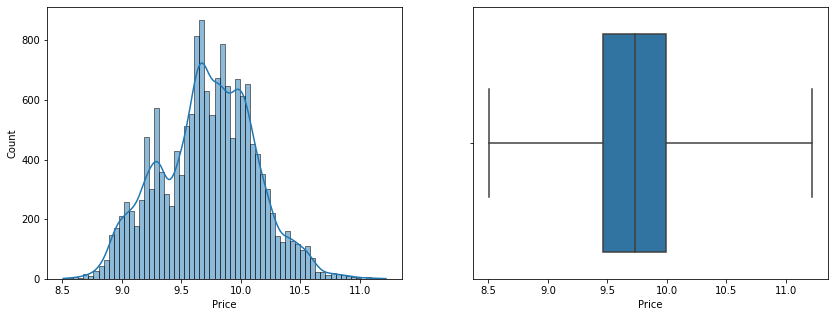

In [94]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(np.log(df.Price), kde=True, ax=ax[0])
sns.boxplot(np.log(df.Price), whis=2.3, ax=ax[1]);

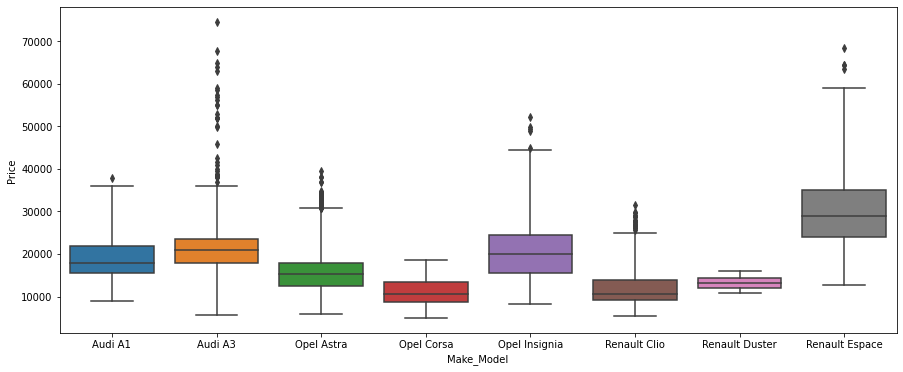

In [95]:
fig, ax = plt.subplots(figsize=(15,6))

sns.boxplot(x=df.Make_Model, y=df.Price, whis=2.3);

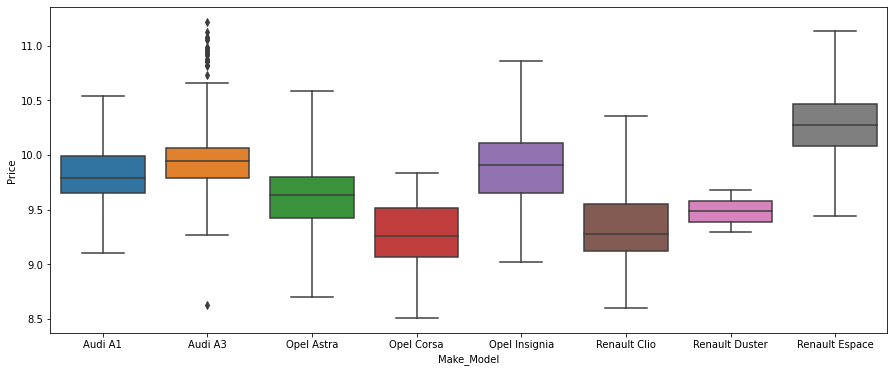

In [96]:
fig, ax = plt.subplots(figsize=(15,6))

sns.boxplot(x=df.Make_Model, y=np.log(df.Price), whis=2.3);

<div class="alert alert-block alert-danger">
    
<b>REVIEW OF OBJECT TYPE COLUMNS</b>
    
</div>

<div class="alert alert-block alert-info">

<b>Make_Model</b></div>

In [97]:
df.groupby('Make_Model').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Make_Model,,,,,,,,
Audi A1,2614.00,18864.69,4505.33,8999.00,15550.00,17890.00,21900.00,37900.00
Audi A3,3097.00,20996.69,5022.79,5555.00,17900.00,20900.00,23500.00,74600.00
Opel Astra,2525.00,15840.83,4943.47,6000.00,12399.00,15290.00,17990.00,39433.00
Opel Corsa,2216.00,11061.84,2964.09,4950.00,8690.00,10500.00,13500.00,18622.00
Opel Insignia,2598.00,21463.45,7710.80,8290.00,15600.00,19990.00,24450.00,52120.00
Renault Clio,1838.00,11942.20,4203.89,5445.00,9112.50,10655.00,13993.75,31500.00
Renault Duster,34.00,13230.18,1622.40,10850.00,11925.00,13189.00,14399.00,16033.00
Renault Espace,991.00,30080.21,8732.38,12614.00,23900.00,28900.00,34975.00,68320.00


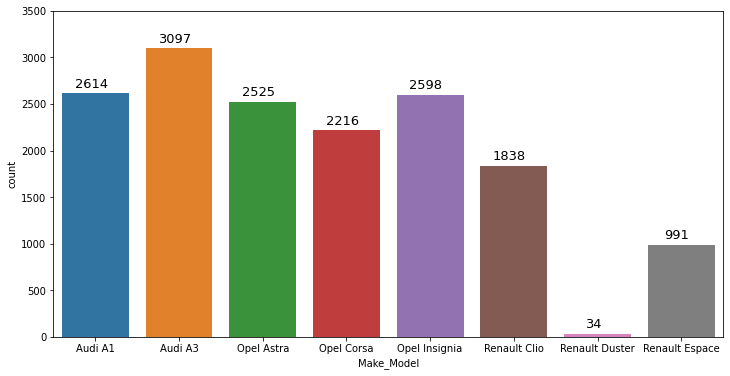

In [98]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Make_Model)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+100), ha='center', va='center', fontsize=13)
    
ax.set_ylim(0, 3500);

<div class="alert alert-block alert-info">

<b>Body_Type</b></div>

In [99]:
df.groupby('Body_Type').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Body_Type,,,,,,,,
Compact,3175.00,15197.70,5708.55,4990.00,10982.00,14490.00,17490.00,67600.00
Convertible,8.00,27905.38,13457.66,10893.00,20675.00,25750.00,31412.50,56100.00
Coupe,25.00,14222.72,7366.37,6900.00,8500.00,11100.00,17094.00,34140.00
Off-Road,55.00,16924.82,7631.59,7700.00,12125.00,14399.00,18290.00,34776.00
Sedans,8099.00,17619.86,6342.06,4950.00,12990.00,17200.00,21700.00,74600.00
Station wagon,3646.00,18575.31,7424.65,5555.00,12980.00,17500.00,22187.50,63900.00
Transporter,88.00,16764.80,7829.78,5250.00,8990.00,18400.00,22625.00,32700.00
Van,817.00,30789.21,8824.70,7900.00,24840.00,29900.00,35475.00,68320.00


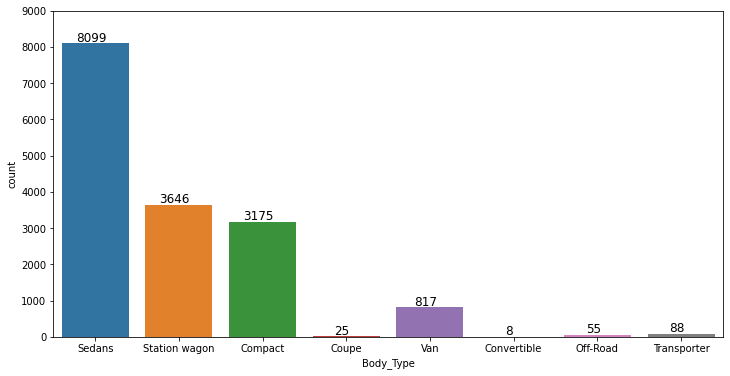

In [100]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Body_Type)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+150), ha='center', va='center', fontsize=12)
    
ax.set_ylim(0, 9000);

<div class="alert alert-block alert-info">

<b>Vat</b></div>

In [101]:
df.groupby('Vat').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Vat,,,,,,,,
Price negotiable,948.00,15478.42,6409.29,6000.00,9800.00,14995.00,18775.00,57400.00
VAT deductible,14965.00,18185.62,7409.40,4950.00,12950.00,16979.00,21996.00,74600.00


<div class="alert alert-block alert-info">

<b>Type</b></div>

In [102]:
df.groupby('Type').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Demonstration,796.00,25774.39,10040.52,8990.00,17890.00,24890.00,33590.00,68320.00
Employee's car,1010.00,18388.40,5682.65,6950.00,14841.25,18800.00,21730.00,47590.00
New,1649.00,23798.83,8435.28,7650.00,18260.00,23139.00,27804.00,64332.00
Pre-registered,1364.00,20743.06,8223.42,6950.00,11489.00,21470.00,26200.00,48490.00
Used,11094.00,16242.55,5978.95,4950.00,11980.50,15850.00,19750.00,74600.00


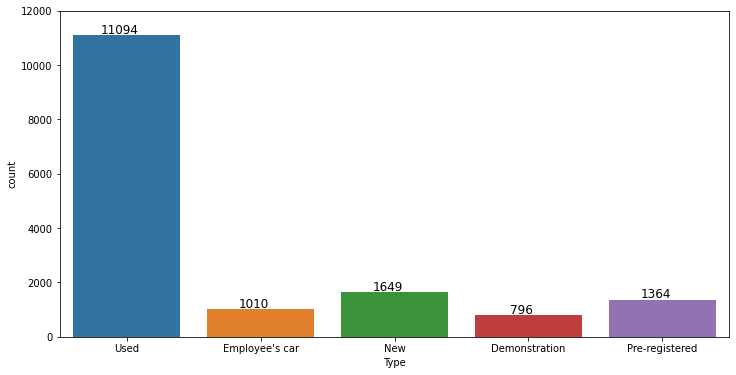

In [103]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Type)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+200), ha='center', va='center', fontsize=12)
    
ax.set_ylim(0, 12000);

<div class="alert alert-block alert-info">

<b>Previous_Owners</b></div>

In [104]:
df.groupby('Previous_Owners').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Previous_Owners,,,,,,,,
0.00,1568.00,23024.67,8399.33,6299.00,17490.00,22590.00,26940.00,64332.00
1.00,13140.00,17705.29,7133.51,4950.00,12625.00,16600.00,21490.00,74600.00
2.00,1175.00,14989.79,5474.21,6300.00,10600.00,14990.00,17975.00,35990.00
3.00,28.00,14921.29,5987.03,7500.00,10500.00,13100.00,17525.00,27000.00
4.00,2.00,20150.00,1626.35,19000.00,19575.00,20150.00,20725.00,21300.00


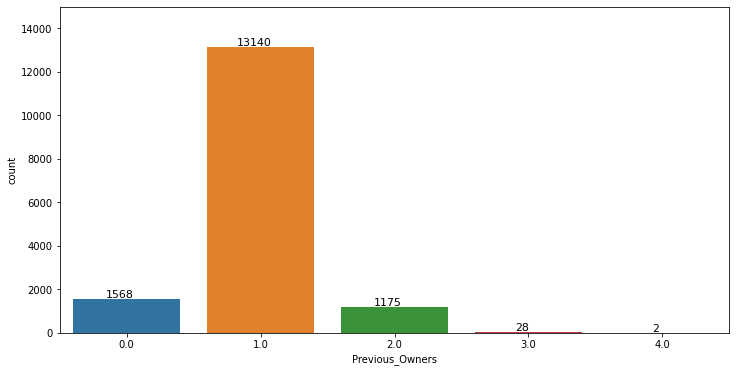

In [105]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Previous_Owners)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+200), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 15000);

<div class="alert alert-block alert-info">

<b>Inspection_New</b></div>

In [106]:
df.groupby('Inspection_New').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Inspection_New,,,,,,,,
0,11981.00,17989.74,7605.55,4950.00,12400.00,16900.00,21990.00,74600.00
1,3932.00,18129.78,6651.43,6290.00,13779.25,16889.00,21633.25,54120.00


<div class="alert alert-block alert-info">

<b>Paint_Type</b></div>

In [107]:
df.groupby('Paint_Type').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Paint_Type,,,,,,,,
Metallic,15245.00,18094.20,7392.52,4950.00,12930.00,16900.00,21949.00,74600.00
Perl effect,32.00,9820.31,4077.58,8490.00,8490.00,8490.00,8492.50,28290.00
Uni/basic,636.00,16762.58,6886.72,5250.00,10979.00,15650.00,21860.00,37599.00


<div class="alert alert-block alert-info">

<b>Nr.OfDoors</b></div>

In [108]:
df.groupby('Nr.OfDoors').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Nr.OfDoors,,,,,,,,
2.00,219.00,13208.09,5145.01,5300.00,9900.00,12990.00,15850.00,56100.00
3.00,831.00,12602.10,4014.04,4990.00,9780.00,11440.00,15420.00,23600.00
4.00,3079.00,18090.07,6391.06,5890.00,13900.00,17350.00,21490.00,74600.00
5.00,11784.00,18479.05,7653.03,4950.00,12955.00,17390.00,22600.00,68320.00


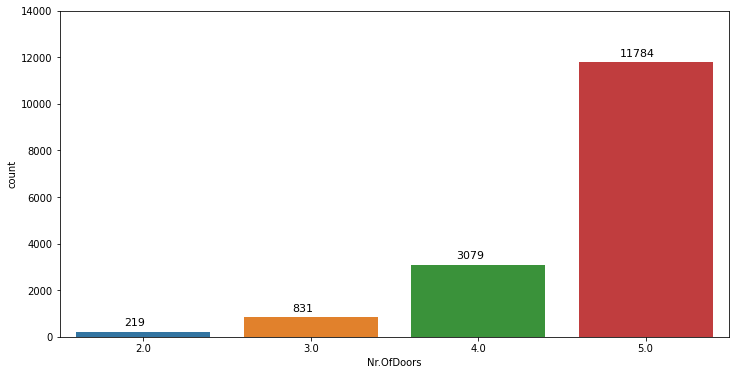

In [109]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df['Nr.OfDoors'])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+400), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 14000);

<div class="alert alert-block alert-info">

<b>Nr.OfSeats</b></div>

In [110]:
df.groupby('Nr.OfSeats').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Nr.OfSeats,,,,,,,,
2.00,119.00,8447.77,1695.85,5250.00,7795.00,7990.00,9495.00,20450.00
4.00,1140.00,17183.03,4098.05,8000.00,14490.00,16000.00,19392.50,68320.00
5.00,14288.00,17834.10,7221.16,4950.00,12480.00,16890.50,21900.00,74600.00
7.00,366.00,31185.25,8576.48,13500.00,25202.75,29900.00,35687.50,64332.00


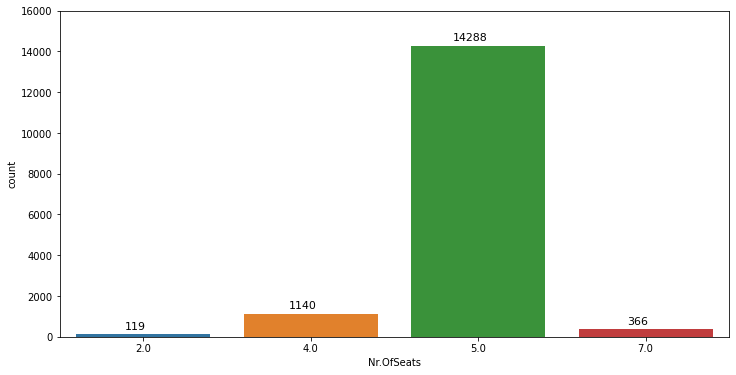

In [111]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df['Nr.OfSeats'])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+400), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 16000);

<div class="alert alert-block alert-info">

<b>Gearing_Type</b></div>

In [112]:
df.groupby('Gearing_Type').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Gearing_Type,,,,,,,,
Automatic,7296.00,21164.91,7284.08,6000.00,15900.00,19900.00,24882.00,68320.00
Manual,8148.00,14912.15,5732.96,4950.00,10290.00,14435.00,18750.00,52120.00
Semi-automatic,469.00,23236.56,10180.07,7200.00,16900.00,21500.00,27000.00,74600.00


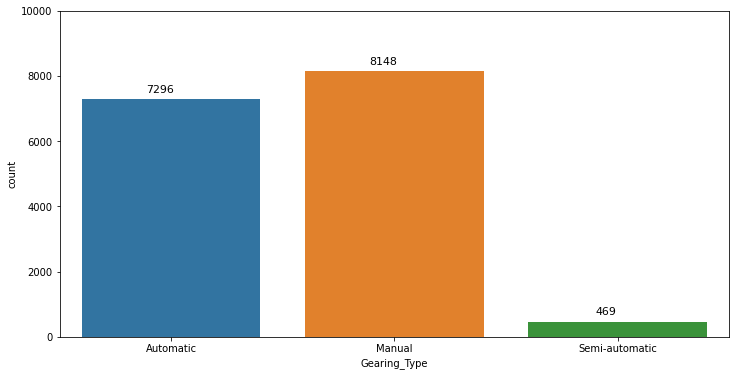

In [113]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Gearing_Type)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+300), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 10000);

<div class="alert alert-block alert-info">

<b>Drive_Chain</b></div>

In [114]:
df.groupby('Drive_Chain').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Drive_Chain,,,,,,,,
4WD,204.00,28261.42,13266.19,9680.00,15672.50,29995.00,36450.00,74600.00
front,15705.00,17892.05,7179.57,4950.00,12780.00,16890.00,21900.00,68320.00
rear,4.00,15332.50,4313.95,10490.00,12297.50,15925.00,18960.00,18990.00


<div class="alert alert-block alert-info">

<b>Fuel</b></div>

In [115]:
df.groupby('Fuel').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Fuel,,,,,,,,
Benzine,8548.00,17899.68,7602.99,4990.00,11949.75,16500.00,22263.75,74600.00
Diesel,7297.00,18176.03,7100.96,4950.00,13480.00,16998.00,21690.00,68320.00
Electric,4.00,34324.75,6347.95,24950.00,33161.75,36949.50,38112.50,38450.00
LPG/CNG,64.00,16359.84,7271.68,6950.00,9500.00,17700.00,22000.00,34738.00


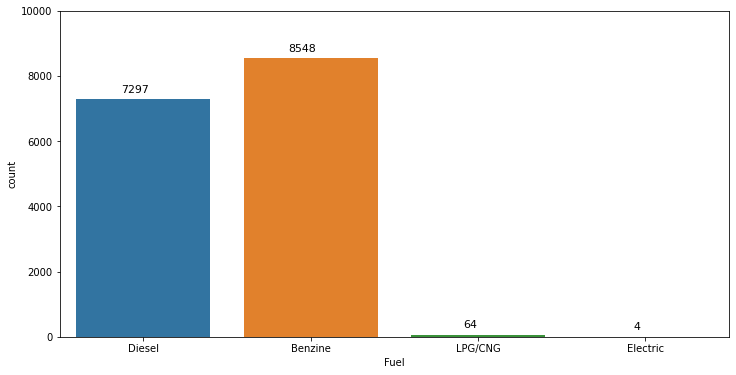

In [116]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Fuel)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+300), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 10000);

<div class="alert alert-block alert-info">

<b>Gears</b></div>

In [117]:
df.groupby('Gears').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Gears,,,,,,,,
5.00,4257.00,12003.68,3856.49,4950.00,8950.00,10900.00,14960.00,27980.00
6.00,8621.00,19179.20,7045.10,5555.00,14480.00,17950.00,22450.00,64332.00
7.00,2810.00,22677.18,6176.58,10400.00,18500.00,21949.00,25747.50,74600.00
8.00,225.00,29577.41,7311.01,12750.00,22980.00,30000.00,36490.00,40990.00


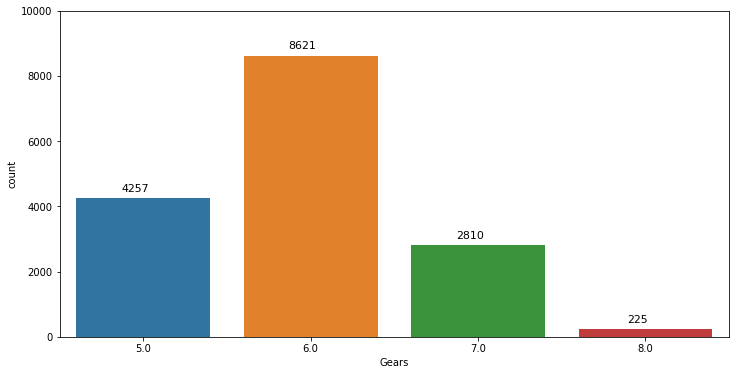

In [118]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Gears)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+300), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 10000);

<div class="alert alert-block alert-info">

<b>Age</b></div>

In [119]:
df.groupby('Age').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0.00,4408.00,22995.85,8721.46,6900.00,16685.00,22990.00,27288.50,68320.00
1.00,4549.00,18504.38,6077.21,5555.00,14800.00,18490.00,21750.00,74600.00
2.00,3277.00,15586.87,5268.86,6000.00,11600.00,15700.00,18900.00,67600.00
3.00,3679.00,13645.29,4449.12,4950.00,10400.00,13880.00,15980.00,42500.00


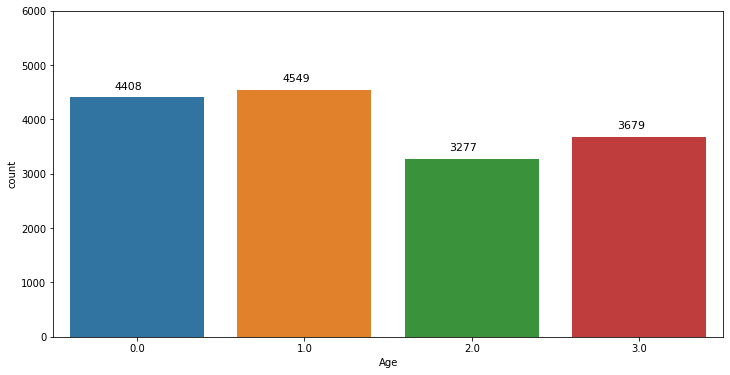

In [120]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Age)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+200), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 6000);

<div class="alert alert-block alert-info">

<b>Upholstery</b></div>

In [121]:
df.groupby('Upholstery_Type').Price.describe()

,count,mean,std,min,25%,50%,75%,max
Upholstery_Type,,,,,,,,
Cloth,12164.00,16444.14,5966.14,4950.00,11450.00,15900.00,20500.00,63477.00
Full leather,1458.00,26558.21,10434.76,8700.00,17999.25,24900.00,33990.00,74600.00
Part leather,2115.00,21105.48,7137.75,6000.00,15900.00,20450.00,23990.00,63900.00
Velour,81.00,18339.83,5641.29,8290.00,13990.00,18680.00,21700.00,31990.00
alcantara,95.00,20518.71,9155.97,6490.00,15945.00,18000.00,26234.50,40990.00


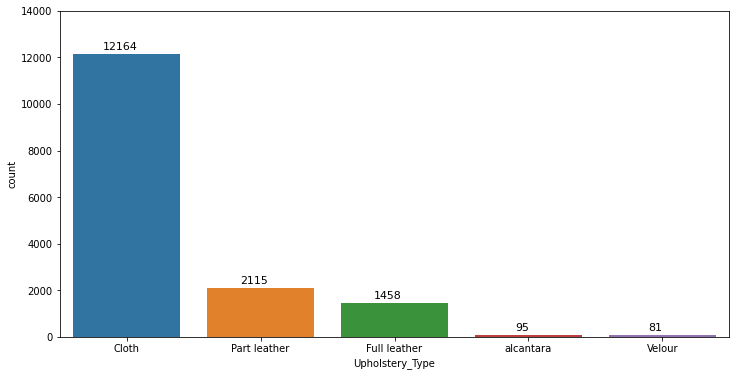

In [122]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(x=df.Upholstery_Type)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+300), ha='center', va='center', fontsize=11)
    
ax.set_ylim(0, 14000);

***

## correlation between numeric columns

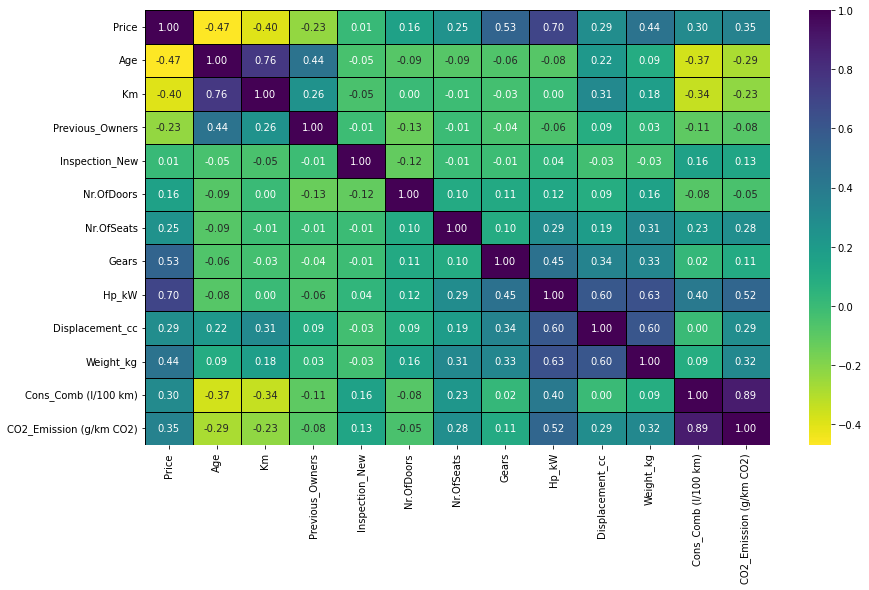

In [123]:
plt.figure(figsize=(14,8))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', cmap='viridis_r', linewidth=1, linecolor='black');

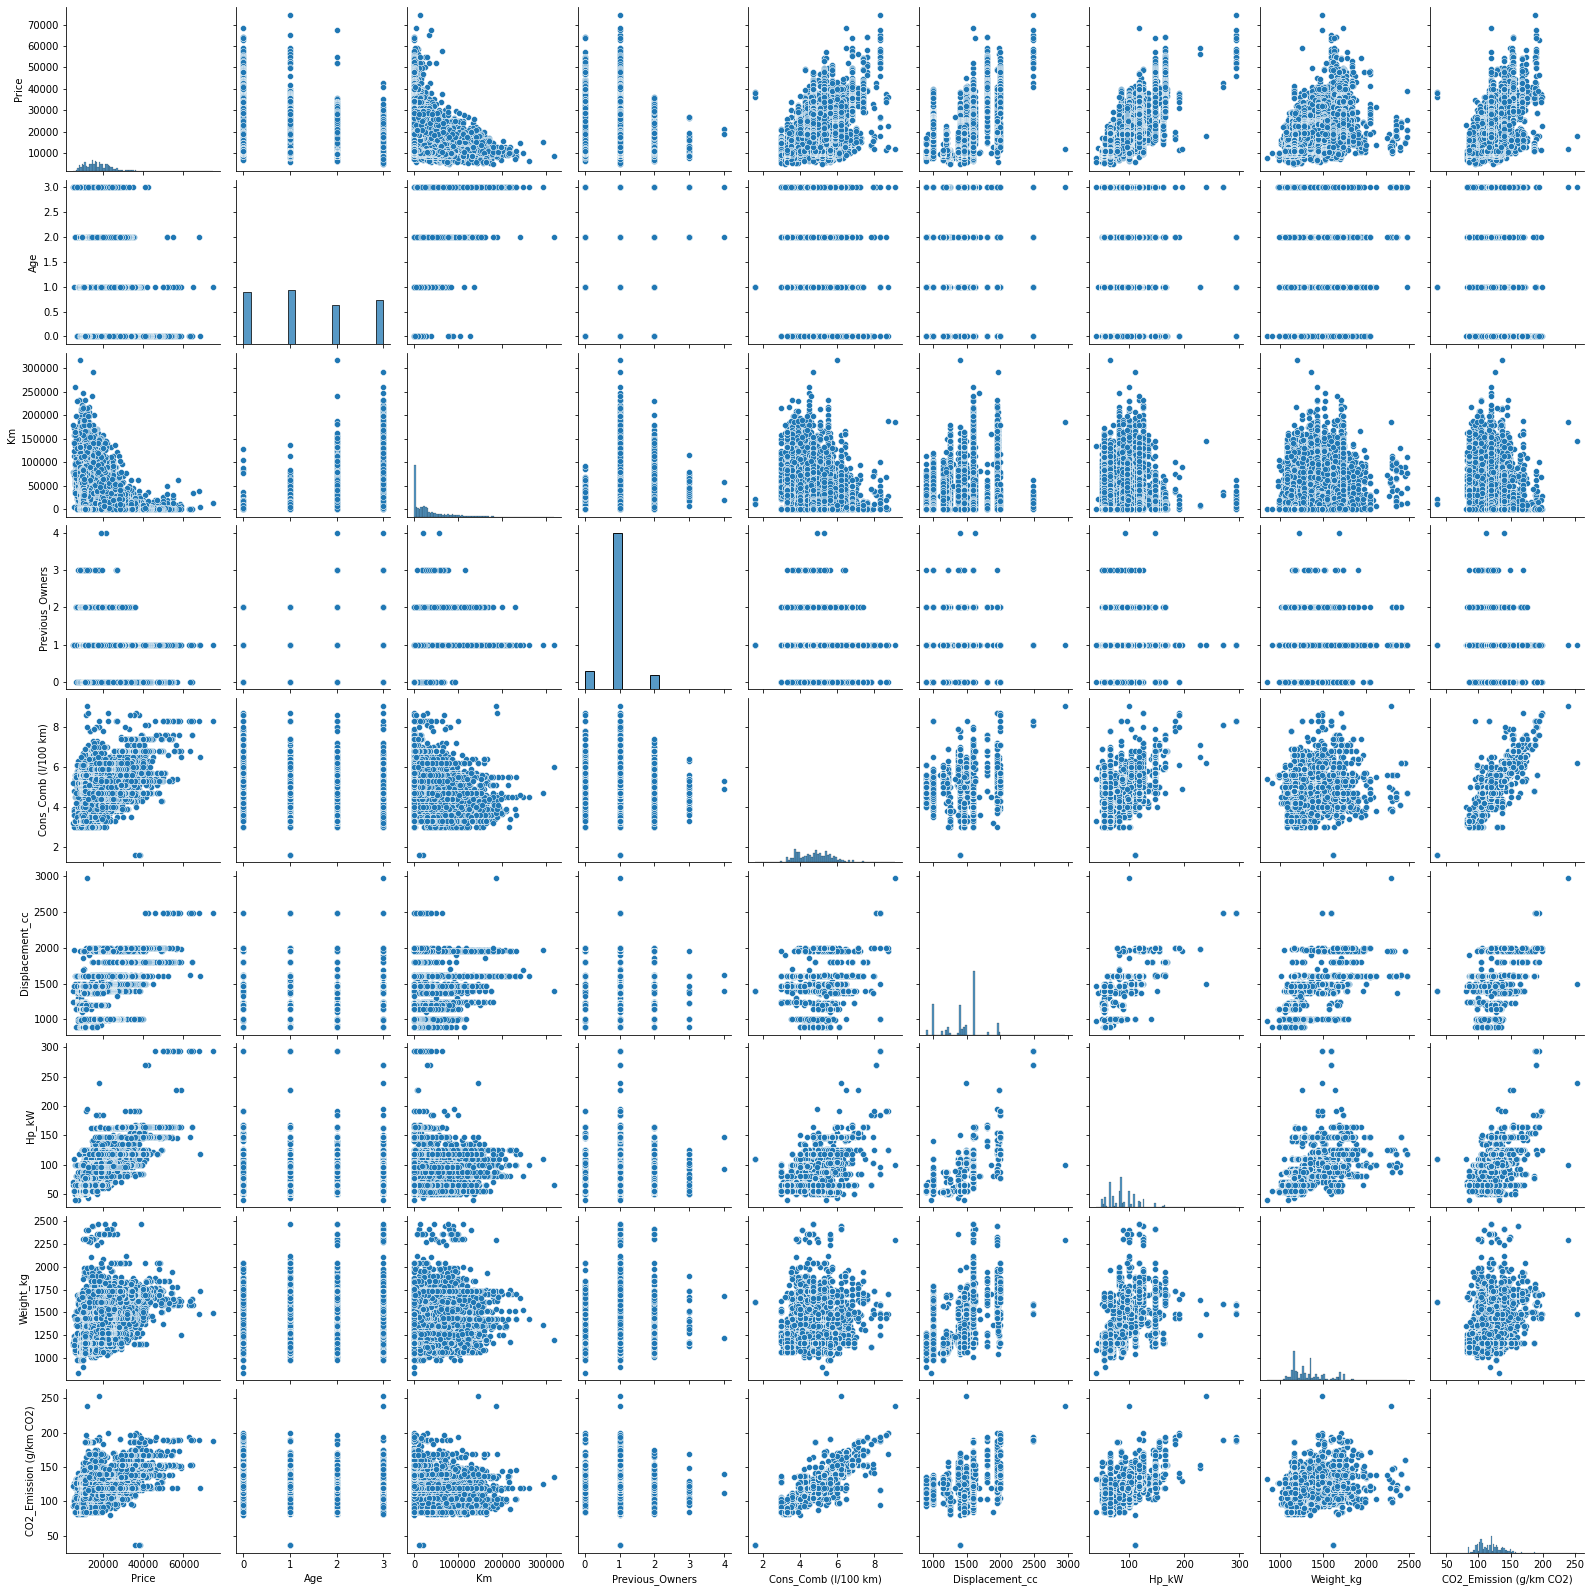

In [124]:
sns.pairplot(df[['Price','Age','Km','Previous_Owners','Cons_Comb (l/100 km)','Displacement_cc' \
                 ,'Hp_kW','Weight_kg','CO2_Emission (g/km CO2)']], size = 2.5);

***

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15913 entries, 0 to 15912
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make_Model               15913 non-null  object 
 1   Body_Type                15913 non-null  object 
 2   Price                    15913 non-null  int64  
 3   Vat                      15913 non-null  object 
 4   Age                      15913 non-null  float64
 5   Type                     15913 non-null  object 
 6   Km                       15913 non-null  float64
 7   Previous_Owners          15913 non-null  float64
 8   Inspection_New           15913 non-null  int64  
 9   Paint_Type               15913 non-null  object 
 10  Nr.OfDoors               15913 non-null  float64
 11  Nr.OfSeats               15913 non-null  float64
 12  Upholstery_Type          15913 non-null  object 
 13  Fuel                     15913 non-null  object 
 14  Drive_Chain           

In [126]:
df.dtypes.value_counts()

object     13
float64    11
int64       2
dtype: int64

In [127]:
df.shape

(15913, 26)

In [128]:
df.size

413738

In [129]:
df.isnull().sum().sum()

0

***

In [130]:
df.to_csv('scoutcar_notdummy.csv', index=False)

***